In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Italy gas consumption.csv',index_col=0,parse_dates=True)

In [3]:
data

,Consumption,Mean temperature
Date,,
2016-01-01,233.59,5.86
2016-01-02,250.99,6.87
2016-01-03,242.07,7.13
2016-01-04,286.05,7.28
2016-01-05,284.71,8.22
...,...,...
2020-12-27,239.09,4.24
2020-12-28,278.86,6.93
2020-12-29,279.21,7.73


<AxesSubplot:xlabel='Date'>

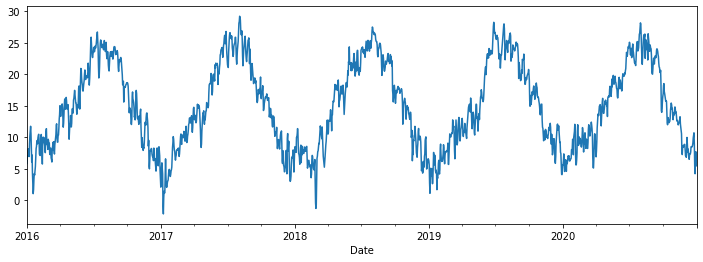

In [4]:
data['Mean temperature'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

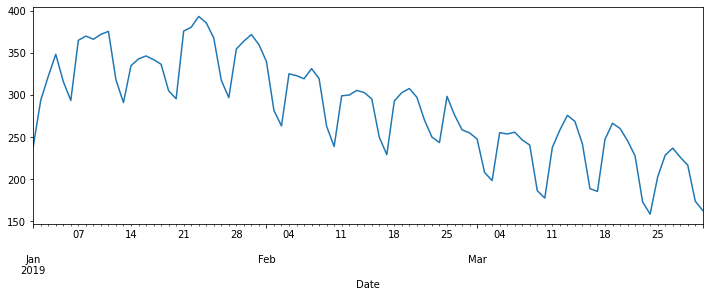

In [5]:
data['Consumption'].loc['2019-Q1'].plot(figsize=(12,4))

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
data['const']=1

In [8]:
data

,Consumption,Mean temperature,const
Date,,,
2016-01-01,233.59,5.86,1
2016-01-02,250.99,6.87,1
2016-01-03,242.07,7.13,1
2016-01-04,286.05,7.28,1
2016-01-05,284.71,8.22,1
...,...,...,...
2020-12-27,239.09,4.24,1
2020-12-28,278.86,6.93,1
2020-12-29,279.21,7.73,1


In [9]:
model = SARIMAX(data['Consumption'],
               exog=data[['Mean temperature','const']],
               order=(2, 0, 2), 
               seasonal_order=(1, 1, 1, 7)).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

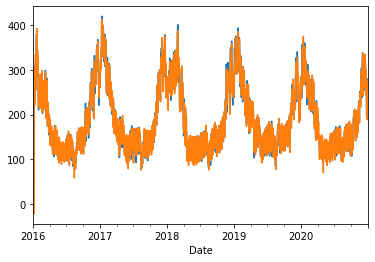

In [10]:
data['Consumption'].plot()
model.predict(start=data.index[0],
             end=data.index[-1],
             exog=data['Mean temperature']).plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
from itertools import product

In [12]:
p = range(0, 3)
q = range(0, 3)
P = range(0, 3)
Q = range(0, 3)

In [13]:
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
len(parameters_list)

81

In [14]:
list_of_aic=[]
for i in range(len(parameters_list)): #для кажного набора определяем критерий Акаике
    model = SARIMAX(data['Consumption'],
               exog=data[['Mean temperature','const']],
               order=(parameters_list[i][0], 1, parameters_list[i][1]), 
               seasonal_order=(parameters_list[i][2], 1, parameters_list[i][3], 7)).fit()
    list_of_aic.append(model.aic)

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No freque

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No freque

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No freque

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

In [15]:
minIndex = list_of_aic.index(min(list_of_aic)) #находим минимальное значение критерия в полученном списке
print(parameters_list[minIndex],list_of_aic[minIndex]) #набор параметров и соответствующее ему мин значение критерия

(2, 2, 2, 1) 14201.374357589588


In [16]:
model_best = SARIMAX(data['Consumption'],
               exog=data[['Mean temperature','const']], 
                order=(parameters_list[minIndex][0], 1, parameters_list[minIndex][1]), 
                seasonal_order=(parameters_list[minIndex][2], 1, parameters_list[minIndex][3], 7)).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
model_best.aic

14201.374357589588

In [18]:
model_best.params

Mean temperature     -2.692484
const                 0.000005
ar.L1                 0.403453
ar.L2                 0.308672
ma.L1                -0.315469
ma.L2                -0.538212
ar.S.L7               0.217568
ar.S.L14              0.060071
ma.S.L7              -0.998277
sigma2              140.164684
dtype: float64

<AxesSubplot:xlabel='Date'>

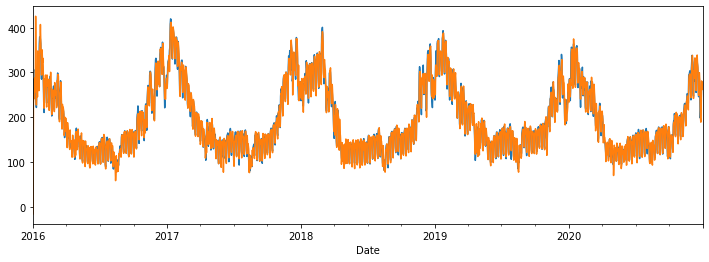

In [19]:
data['Consumption'].plot(figsize=(12,4))
model_best.predict(start=data.index[0],
             end=data.index[-1],
             exog=data['Mean temperature']).plot(figsize=(12,4))

In [21]:
model2 = SARIMAX(data['Consumption'],
               exog=data[['Mean temperature','const']],
               order=(2, 1, 2), 
               seasonal_order=(1, 1, 1, 7)).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

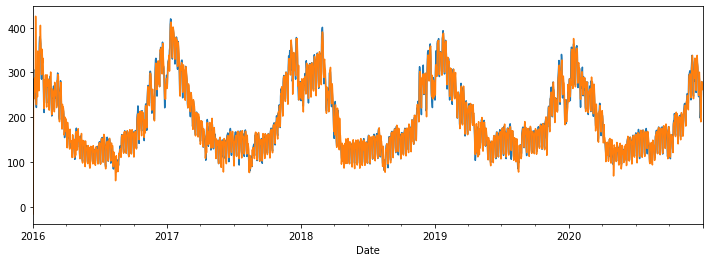

In [22]:
data['Consumption'].plot(figsize=(12,4))
model2.predict(start=data.index[0],
             end=data.index[-1],
             exog=data['Mean temperature']).plot(figsize=(12,4))

In [23]:
temp=data['Mean temperature']

In [25]:
mean_temp=temp.groupby([temp.index.month,
              temp.index.day]).mean()

In [28]:
exog=pd.DataFrame(mean_temp[1])
exog['const']=1

<AxesSubplot:xlabel='Date'>

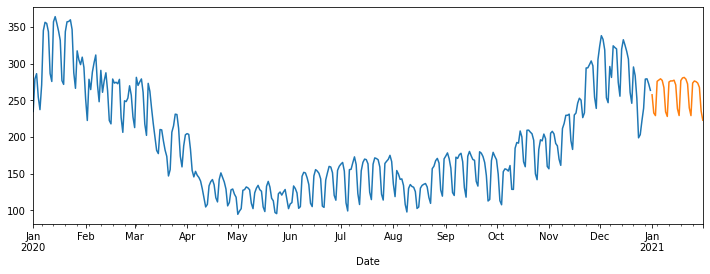

In [31]:
data['Consumption'].loc['2020'].plot(figsize=(12,4))
model2.predict(start='2021-01-01',
             end='2021-01-31',
             exog=exog).plot(figsize=(12,4))